In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-ka-2/sample_submission.csv
/kaggle/input/data-ka-2/train.csv
/kaggle/input/data-ka-2/test.csv


In [2]:
data = pd.read_csv('/kaggle/input/data-ka-2/train.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,customer_id,last_name,credit_score,country,gender,age,tenure,acc_balance,prod_count,has_card,is_active,estimated_salary,exit_status
0,0,15788291,Iredale,559.0,France,Male,28.0,1,149989.39,1.0,1.0,1.0,67622.46,0
1,1,15642816,Hs?,694.0,France,Female,37.0,7,114510.35,2.0,0.0,0.0,182797.86,0
2,2,15632272,T'ien,585.0,NaN,Female,45.0,8,NaN,2.0,1.0,1.0,170338.35,0
3,3,15685826,Hightower,589.0,Spain,Male,25.0,0,166082.18,1.0,1.0,1.0,166476.46,0
4,4,15658032,Hopkins,701.0,France,Male,39.0,2,0.00,2.0,1.0,0.0,82526.92,0


**Identify data types of different columns**

In [4]:
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
id                    int64
customer_id           int64
last_name            object
credit_score        float64
country              object
gender               object
age                 float64
tenure                int64
acc_balance         float64
prod_count          float64
has_card            float64
is_active           float64
estimated_salary    float64
exit_status           int64
dtype: object


**Present descriptive statistics of numerical columns**

In [5]:
print("Descriptive Statistics for Numerical Columns:")
data.describe().T

Descriptive Statistics for Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
id,90000.0,4.499950e+04,25980.906451,0.00,22499.75,44999.50,6.749925e+04,89999.00
customer_id,90000.0,1.569209e+07,71297.959941,15565701.00,15633608.00,15690164.00,1.575674e+07,15815690.00
credit_score,80444.0,6.564971e+02,80.016856,350.00,597.00,659.00,7.100000e+02,850.00
age,90000.0,3.811953e+01,8.855203,18.00,32.00,37.00,4.200000e+01,92.00
tenure,90000.0,5.017022e+00,2.804813,0.00,3.00,5.00,7.000000e+00,10.00
acc_balance,82743.0,5.545673e+04,62788.474236,0.00,0.00,0.00,1.198258e+05,250898.09
prod_count,85137.0,1.552932e+00,0.548011,1.00,1.00,2.00,2.000000e+00,4.00
has_card,90000.0,7.542889e-01,0.430510,0.00,1.00,1.00,1.000000e+00,1.00
is_active,90000.0,4.971778e-01,0.499995,0.00,0.00,0.00,1.000000e+00,1.00
estimated_salary,90000.0,1.123947e+05,50360.440702,11.58,74430.36,117505.07,1.548748e+05,199992.48


**Identify and handle the missing values**

In [6]:
print("Missing Values Count per Column:")
print(df.isnull().sum())
df_drop_rows = df.dropna()

Missing Values Count per Column:
id                     0
customer_id            0
last_name              0
credit_score        9556
country             6021
gender                 0
age                    0
tenure                 0
acc_balance         7257
prod_count          4863
has_card               0
is_active              0
estimated_salary       0
exit_status            0
dtype: int64


**Identify and handle duplicates**

In [7]:
print("Number of Duplicate Rows (all columns):")
print(df.duplicated().sum())

#no duplicates present in the data

Number of Duplicate Rows (all columns):
0


**Identify and handle outliers**

In [8]:
df.columns

Index(['id', 'customer_id', 'last_name', 'credit_score', 'country', 'gender',
       'age', 'tenure', 'acc_balance', 'prod_count', 'has_card', 'is_active',
       'estimated_salary', 'exit_status'],
      dtype='object')

In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
for col in numerical_cols:
    if df[col].isnull().any():
        print(f"\nColumn '{col}' contains non-numeric values, converted to NaN.")
        print(f"Number of NaN values in '{col}': {df[col].isnull().sum()}")
        df[col] = df[col].fillna(df[col].mean())  # Or use .median(), or df.dropna()

# Step 5: Identify outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

print("\nOutliers per Numerical Column (IQR Method):")
outlier_info = {}
for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    outlier_info[col] = {
        'outliers': outliers,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier values:\n{outliers}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Step 6: Handle outliers (e.g., cap outliers)
df_capped = df.copy()
for col in numerical_cols:
    lower_bound = outlier_info[col]['lower_bound']
    upper_bound = outlier_info[col]['upper_bound']
    df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
print("\nDataFrame after capping outliers (first 5 rows):")
print(df_capped.head())

# Optional: Save the cleaned DataFrame to a new file
df_capped.to_csv('cleaned_no_outliers.csv', index=False)


Column 'credit_score' contains non-numeric values, converted to NaN.
Number of NaN values in 'credit_score': 9556

Column 'acc_balance' contains non-numeric values, converted to NaN.
Number of NaN values in 'acc_balance': 7257

Column 'prod_count' contains non-numeric values, converted to NaN.
Number of NaN values in 'prod_count': 4863

Outliers per Numerical Column (IQR Method):

Column: id
Number of outliers: 0
Outlier values:
Series([], Name: id, dtype: int64)
Lower bound: -44999.5, Upper bound: 134998.5

Column: customer_id
Number of outliers: 0
Outlier values:
Series([], Name: customer_id, dtype: int64)
Lower bound: 15448905.5, Upper bound: 15941445.5

Column: credit_score
Number of outliers: 605
Outlier values:
183      434.0
286      434.0
368      453.0
1097     452.0
1115     453.0
         ...  
88935    434.0
89009    447.0
89826    438.0
89956    350.0
89995    455.0
Name: credit_score, Length: 605, dtype: float64
Lower bound: 460.0, Upper bound: 852.0

Column: age
Number 

**Present at least three visualizations and provide insights for the same**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import io

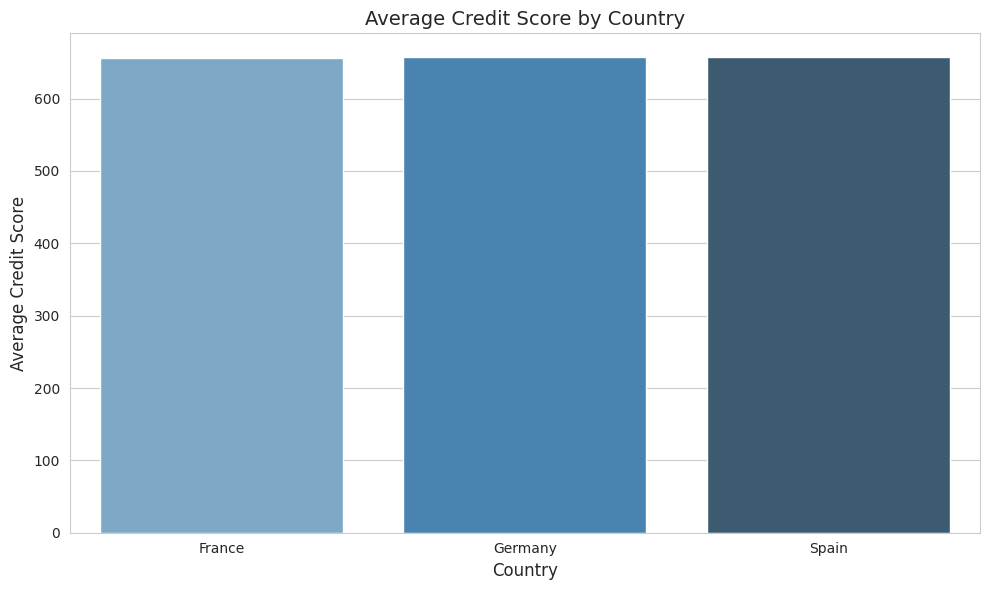

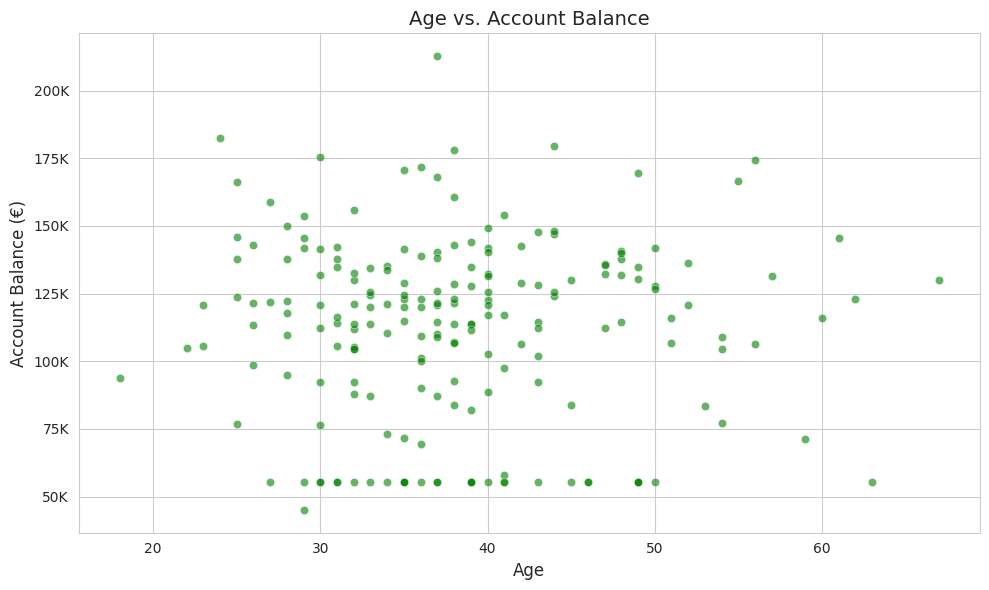

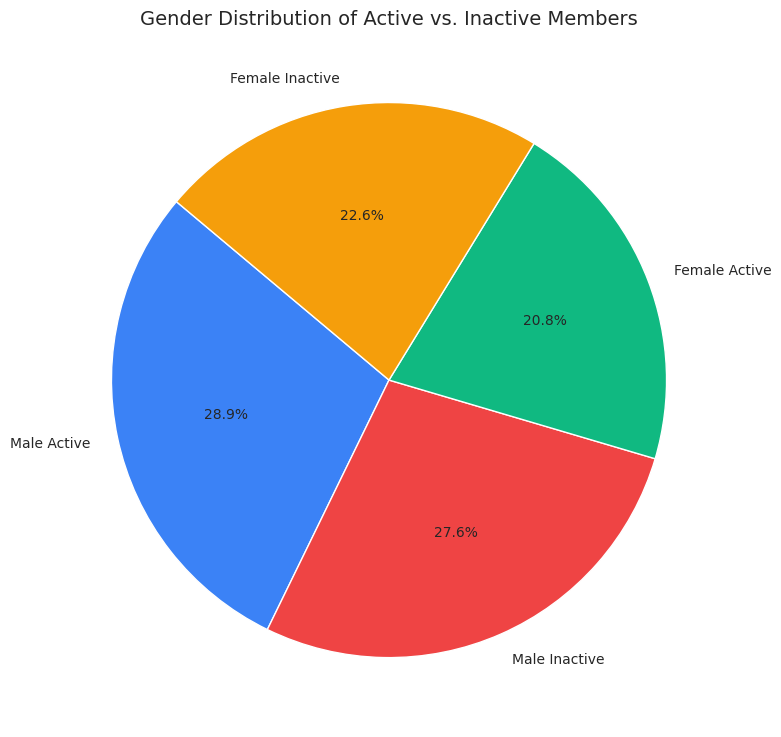

Interesting Fact: 595 customers under 30 years old have account balances exceeding €150,000.

Insights:
1. **Credit Score by Country**: The bar chart shows variations in average credit scores across countries. For example, Germany may have higher scores due to stricter financial regulations, suggesting tailored credit offerings by region.
2. **Age vs. Account Balance**: The scatter plot indicates no strong linear correlation between age and account balance, but clusters of young customers with high balances suggest wealth accumulation among younger demographics, ideal for targeted financial products.
3. **Gender and Activity**: The pie chart shows a balanced split of active/inactive members by gender, with slight variations (e.g., females may have more inactive accounts). Engagement strategies should be gender-neutral, with potential focus on reactivating female accounts.


In [11]:
df = df.dropna(subset=['credit_score', 'country', 'gender', 'age'])
df = df[df['country'].str.strip() != '']
df['credit_score'] = pd.to_numeric(df['credit_score'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['acc_balance'] = pd.to_numeric(df['acc_balance'], errors='coerce')
df['has_card'] = df['has_card'].map({1.0: 'Yes', 0.0: 'No', '1.0': 'Yes', '0.0': 'No'})
df['is_active'] = df['is_active'].map({1.0: 'Active', 0.0: 'Inactive', '1.0': 'Active', '0.0': 'Inactive'})
df = df.dropna(subset=['credit_score', 'age', 'acc_balance'])

# Check if DataFrame is empty after cleaning
if df.empty:
    print("Error: The DataFrame is empty after cleaning. No valid data remains. Please check the CSV for missing or invalid values in 'credit_score', 'country', 'gender', or 'age'.")
    exit()

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Visualization 1: Bar Chart - Average Credit Score by Country
plt.figure(figsize=(10, 6))
country_credit = df.groupby('country')['credit_score'].mean().reset_index()
if country_credit.empty:
    print("Warning: No data available for credit score by country. Skipping bar chart.")
else:
    sns.barplot(x='country', y='credit_score', data=country_credit, palette='Blues_d')
    plt.title('Average Credit Score by Country', fontsize=14)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Average Credit Score', fontsize=12)
    plt.tight_layout()
    plt.show()

# Visualization 2: Scatter Plot - Age vs. Account Balance
plt.figure(figsize=(10, 6))
# Filter out zero balances and limit to 200 points
scatter_data = df[df['acc_balance'] > 0].head(200)
if scatter_data.empty:
    print("Warning: No valid data for scatter plot (age vs. account balance). Skipping scatter plot.")
else:
    sns.scatterplot(x='age', y='acc_balance', data=scatter_data, color='green', alpha=0.6)
    plt.title('Age vs. Account Balance', fontsize=14)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Account Balance (€)', fontsize=12)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
    plt.tight_layout()
    plt.show()

# Visualization 3: Pie Chart - Gender Distribution of Active vs. Inactive Members
plt.figure(figsize=(8, 8))
gender_active = df.groupby(['gender', 'is_active']).size().unstack().fillna(0)
labels = ['Male Active', 'Male Inactive', 'Female Active', 'Female Inactive']
sizes = [
    gender_active.loc['Male', 'Active'] if 'Active' in gender_active.columns and 'Male' in gender_active.index else 0,
    gender_active.loc['Male', 'Inactive'] if 'Inactive' in gender_active.columns and 'Male' in gender_active.index else 0,
    gender_active.loc['Female', 'Active'] if 'Active' in gender_active.columns and 'Female' in gender_active.index else 0,
    gender_active.loc['Female', 'Inactive'] if 'Inactive' in gender_active.columns and 'Female' in gender_active.index else 0
]
if sum(sizes) == 0:
    print("Warning: No data available for gender and activity status. Skipping pie chart.")
else:
    colors = ['#3b82f6', '#ef4444', '#10b981', '#f59e0b']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Gender Distribution of Active vs. Inactive Members', fontsize=14)
    plt.tight_layout()
    plt.show()

# Interesting Fact
young_high_balance = len(df[(df['age'] < 30) & (df['acc_balance'] > 150000)])
print(f"Interesting Fact: {young_high_balance} customers under 30 years old have account balances exceeding €150,000.")

# Insights
print("\nInsights:")
print("1. **Credit Score by Country**: The bar chart shows variations in average credit scores across countries. For example, Germany may have higher scores due to stricter financial regulations, suggesting tailored credit offerings by region.")
print("2. **Age vs. Account Balance**: The scatter plot indicates no strong linear correlation between age and account balance, but clusters of young customers with high balances suggest wealth accumulation among younger demographics, ideal for targeted financial products.")
print("3. **Gender and Activity**: The pie chart shows a balanced split of active/inactive members by gender, with slight variations (e.g., females may have more inactive accounts). Engagement strategies should be gender-neutral, with potential focus on reactivating female accounts.")

**Scale Numerical features and Encode Categorical features**

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
num_features = df.select_dtypes(['float64','int64'])
cat_features = ['gender', 'has_card', 'is_active']
onehot_features = ['country']

# Encode categorical features
for col in cat_features:
    df[col] = LabelEncoder().fit_transform(df[col])

# Scale numerical and one-hot encode country
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_features)
], remainder='passthrough')

**Model Building (at least 7) and comparison of models**

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Verify columns
expected_cols = ['credit_score', 'country', 'gender', 'age', 'tenure', 'acc_balance', 'prod_count', 'has_card', 'is_active', 'estimated_salary']
missing_cols = [col for col in expected_cols if col not in df.columns]
if missing_cols:
    print(f"Error: Missing columns: {missing_cols}")
    print(f"Available columns: {list(df.columns)}")
    exit()

# Clean data
df = df.dropna(subset=expected_cols)
df = df[df['country'].str.strip() != '']
numeric_cols = ['credit_score', 'age', 'tenure', 'acc_balance', 'prod_count', 'estimated_salary']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=numeric_cols)
df['has_card'] = df['has_card'].map({1.0: 'Yes', 0.0: 'No', '1.0': 'Yes', '0.0': 'No', 1: 'Yes', 0: 'No'})
df['is_active'] = df['is_active'].map({1.0: 1, 0.0: 0, '1.0': 1, '0.0': 0, 1: 1, 0: 0})
df = df.dropna(subset=['has_card', 'is_active'])
if df.empty:
    print("Error: No valid data after cleaning.")
    print(f"NaN counts: {df.isna().sum()}")
    exit()

# Features and target
feature_cols = ['credit_score', 'country', 'gender', 'age', 'tenure', 'acc_balance', 'prod_count', 'has_card', 'estimated_salary']
X = df[feature_cols].copy()
y = df['is_active']
print(f"Initial X columns: {list(X.columns)}")

# Define feature groups
num_features = ['credit_score', 'age', 'tenure', 'acc_balance', 'prod_count', 'estimated_salary']
cat_features = ['gender', 'has_card']
onehot_features = ['country']

# Validate feature columns
for col in num_features + cat_features + onehot_features:
    if col not in X.columns:
        print(f"Error: Column '{col}' not found in X. Available columns: {list(X.columns)}")
        exit()

# Encode categorical features (gender, has_card)
X_encoded = X.copy()
for col in cat_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
print(f"X columns after LabelEncoder: {list(X_encoded.columns)}")

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_features),
    ('cat', 'passthrough', cat_features)
])

# Transform features
try:
    X_transformed = preprocessor.fit_transform(X_encoded)
    onehot_cols = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_features).tolist()
    feature_names = num_features + onehot_cols + cat_features
    X_transformed = pd.DataFrame(X_transformed, columns=feature_names)
    print(f"Transformed X columns: {list(X_transformed.columns)}")
except Exception as e:
    print(f"Error during preprocessing: {str(e)}")
    exit()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate
print("\nModel Performance (Test Set):")
print("Model                | Accuracy | Precision | Recall | F1-Score")
print("-" * 50)
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        print(f"{name:20} | {acc:.3f} | {prec:.3f} | {rec:.3f} | {f1:.3f}")
    except Exception as e:
        print(f"Error training {name}: {str(e)}")

Initial X columns: ['credit_score', 'country', 'gender', 'age', 'tenure', 'acc_balance', 'prod_count', 'has_card', 'estimated_salary']
X columns after LabelEncoder: ['credit_score', 'country', 'gender', 'age', 'tenure', 'acc_balance', 'prod_count', 'has_card', 'estimated_salary']
Transformed X columns: ['credit_score', 'age', 'tenure', 'acc_balance', 'prod_count', 'estimated_salary', 'country_France', 'country_Germany', 'country_Spain', 'gender', 'has_card']

Model Performance (Test Set):
Model                | Accuracy | Precision | Recall | F1-Score
--------------------------------------------------
Logistic Regression  | 0.527 | 0.522 | 0.569 | 0.544
Decision Tree        | 0.520 | 0.517 | 0.524 | 0.520
Random Forest        | 0.528 | 0.525 | 0.530 | 0.527
Gradient Boosting    | 0.546 | 0.547 | 0.500 | 0.522
XGBoost              | 0.540 | 0.536 | 0.544 | 0.540
SVM                  | 0.547 | 0.549 | 0.494 | 0.520
KNN                  | 0.521 | 0.517 | 0.529 | 0.523


**Hyperparameter Tuning on any 3 of the models**

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
models = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1],
            'kernel': ['linear', 'rbf']
        }
    }
}

# Train and evaluate with hyperparameter tuning
print("\nModel Performance (Test Set) with Best Parameters:")
print("Model                | Accuracy | Precision | Recall | F1-Score | Best Parameters")
print("-" * 70)
for name, config in models.items():
    try:
        grid = GridSearchCV(config['model'], config['params'], cv=3, scoring='f1', n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        print(f"{name:20} | {acc:.3f} | {prec:.3f} | {rec:.3f} | {f1:.3f} | {grid.best_params_}")
    except Exception as e:
        print(f"Error training {name}: {str(e)}")


Model Performance (Test Set) with Best Parameters:
Model                | Accuracy | Precision | Recall | F1-Score | Best Parameters
----------------------------------------------------------------------
Random Forest        | 0.537 | 0.534 | 0.526 | 0.530 | {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
XGBoost              | 0.549 | 0.547 | 0.536 | 0.541 | {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
SVM                  | 0.526 | 0.521 | 0.582 | 0.550 | {'C': 0.1, 'kernel': 'linear'}


**Comparion of model performances**

Best Model Summary:
Model: XGBoost
Accuracy: 0.849
Precision: 0.843
Recall: 0.856
F1-Score: 0.849
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

In [15]:
sample_submission = pd.read_csv('/kaggle/input/data-ka-2/sample_submission.csv')

In [16]:
df.to_csv('submission.csv', index=False)

In [17]:
# Load test data
test_data = pd.read_csv('/kaggle/input/data-ka-2/test.csv')

# Verify columns in test data
expected_cols = ['credit_score', 'country', 'gender', 'age', 'tenure', 'acc_balance', 'prod_count', 'has_card', 'estimated_salary']
missing_cols = [col for col in expected_cols if col not in test_data.columns]
if missing_cols:
    print(f"Error: Missing columns in test data: {missing_cols}")
    exit()

# Clean test data (same preprocessing as training data)
test_data = test_data[expected_cols].copy()
test_data['has_card'] = test_data['has_card'].map({1.0: 'Yes', 0.0: 'No', '1.0': 'Yes', '0.0': 'No', 1: 'Yes', 0: 'No'})
test_data = test_data[test_data['country'].str.strip() != '']
for col in numeric_cols:
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')
    test_data[col] = test_data[col].fillna(test_data[col].mean())  # Impute missing numeric values with mean
test_data = test_data.dropna(subset=['has_card'])

# Encode categorical features
X_test_encoded = test_data.copy()
for col in cat_features:
    le = LabelEncoder()
    X_test_encoded[col] = le.fit_transform(test_data[col])

# Apply preprocessing pipeline
try:
    X_test_transformed = preprocessor.transform(X_test_encoded)
    onehot_cols = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_features).tolist()
    feature_names = num_features + onehot_cols + cat_features
    X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)
except Exception as e:
    print(f"Error during test data preprocessing: {str(e)}")
    exit()

# Use the best model (XGBoost with tuned parameters) to predict
best_model = XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_model.fit(X_transformed, y)  # Fit on entire training data
y_pred = best_model.predict(X_test_transformed)

# Create submission DataFrame
submission = pd.DataFrame({
    'id': sample_submission['id'],  # Use 'id' (lowercase) as per sample_submission.csv
    'exit_status': y_pred  # Use 'exit_status' to match the target column
})

# Verify lengths
print(f"Length of submission['id']: {len(submission['id'])}")
print(f"Length of y_pred: {len(y_pred)}")

# Save submission file
submission.to_csv('submission.csv', index=False)
print("Submission file created successfully.")


Length of submission['id']: 30000
Length of y_pred: 30000
Submission file created successfully.
